In [1]:
% load_ext rpy2.ipython

In [2]:
%%R
#ip <- installed.packages() 
#pkgs.to.remove <- ip[!(ip[,"Priority"] %in% c("base", "recommended")), 1]
#sapply(pkgs.to.remove, remove.packages)

NULL


In [3]:
%%R
#source("http://bioconductor.org/biocLite.R")
#biocLite("phyloseq")

NULL


In [2]:
%%R
library("phyloseq")
library(ggplot2)

In [7]:
%%R
physeq = import_biom("../../SeqData/otu_table.tax.meta.biom", parseFunction = parse_taxonomy_greengenes)

In [14]:
%%R
physeq = prune_samples(sampleSums(physeq)>=1500, physeq)

In [15]:
%%R
sample_data(physeq)

Sample Data:        [71 samples by 3 sample variables]:
    Cosm Trtmt Day
125   41     X   3
9      2     N   7
73    27     N   1
39    25     X   2
113   38     N   3
11     2     N   0
77    27     N   3
91     5     X   5
3      2     N   2
5      2     N   3
65    30     X   3
75    27     N   2
79    27     N   5
123   41     X   2
69    30     X   7
61    30     X   1
145   33     N   0
17    18     X   3
83    27     N   0
89     5     X   3
21    18     X   7
117   38     N   7
119   38     N   0
137   27     N   3
105   39     X   7
67    30     X   5
1      2     N   1
133   27     N   2
7      2     N   5
97    39     X   1
33     6     N   7
23    18     X   0
121   41     X   1
135   27     N   5
55    23     N   5
15    18     X   2
71    30     X   0
85     5     X   1
53    23     N   3
115   38     N   5
49    23     N   1
129   41     X   0
41    25     X   3
99    39     X   2
47    25     X   0
13    18     X   1
29     6     N   3
43    25     X   5
19    18     

In [16]:
%%R
# Normalizes the sample counts by the total - i.e., reporting what fraction of each sample each OTU makes up.
ps_snorm = transform_sample_counts(physeq, function(x) x / sum(x))

In [26]:
%%R
# Computing the Bray distance matrix and NMDS in parallel

ord.full = ordinate(ps_snorm, method = "NMDS", distance = "bray", weighted=TRUE, k=3, trymax=40)
# Consider trymax= and k=3

Error: Discrete value supplied to continuous scale
Run 0 stress 0.09380445 
Run 1 stress 0.09382373 
... procrustes: rmse 0.00398275  max resid 0.02379906 
Run 2 stress 0.0938317 
... procrustes: rmse 0.01040761  max resid 0.04895032 
Run 3 stress 0.09367774 
... New best solution
... procrustes: rmse 0.007511612  max resid 0.05140116 
Run 4 stress 0.09366887 
... New best solution
... procrustes: rmse 0.002610535  max resid 0.01911909 
Run 5 stress 0.09380187 
... procrustes: rmse 0.007661866  max resid 0.05234347 
Run 6 stress 0.09369598 
... procrustes: rmse 0.006584866  max resid 0.04411507 
Run 7 stress 0.09381396 
... procrustes: rmse 0.009524942  max resid 0.05168634 
Run 8 stress 0.09369156 
... procrustes: rmse 0.006290612  max resid 0.0415335 
Run 9 stress 0.1046321 
Run 10 stress 0.1023115 
Run 11 stress 0.09369155 
... procrustes: rmse 0.005892467  max resid 0.04658152 
Run 12 stress 0.09397115 
... procrustes: rmse 0.01004941  max resid 0.05720284 
Run 13 stress 0.09381902

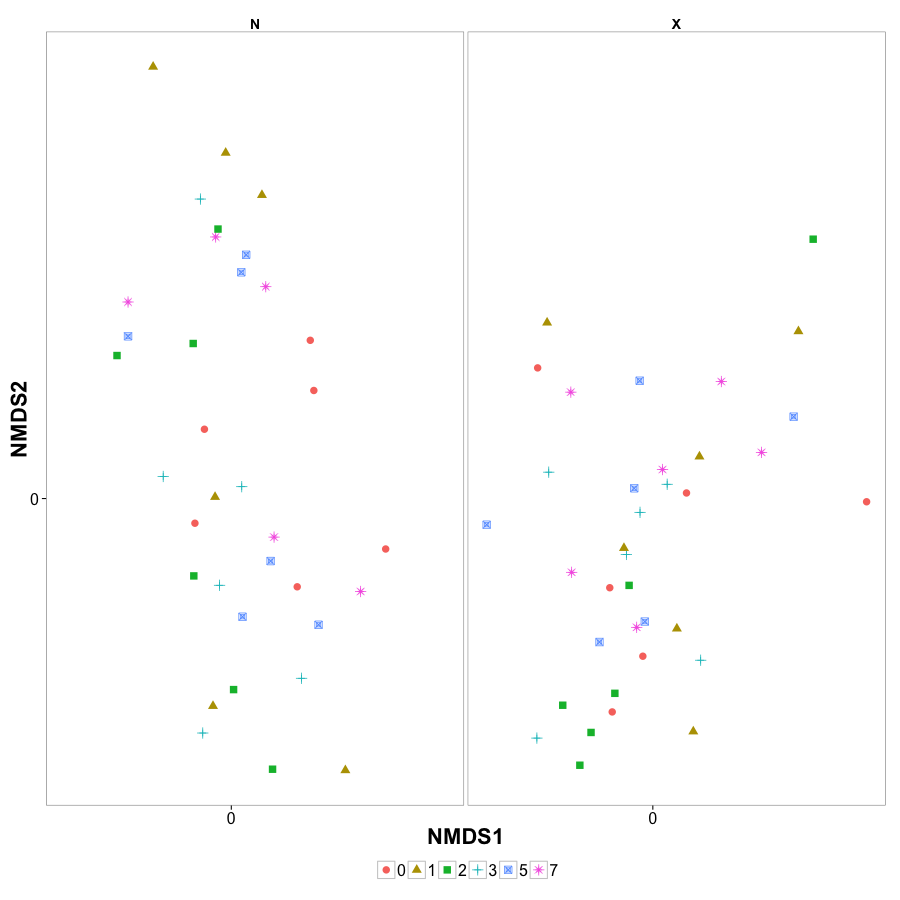

In [30]:
%%R -h 900 -w 900
D <- ord.full
# Sets the relevant ordination

sample_data(ps_snorm)$Cosm=as.factor(sample_data(ps_snorm)$Cosm)
sample_data(ps_snorm)$Day=as.factor(sample_data(ps_snorm)$Day)

# Creates an plot object, using the df.sites data, with the x and y axes specified as the PCoA axes,
p = plot_ordination(ps_snorm, D, color = "Day", shape = "Day", axes=c(1,2))

# Determines the size of the symbols
p = p  + geom_point(size=3.5) 
#+ scale_colour_manual(values=c("skyblue3","darkorange","chartreuse4","red3","black","gold1"))

p = p + guides(colour = guide_legend(""), shape = guide_legend(""))
#p = p + scale_shape_manual(values=c(19,4,17,15,3))

p = p + scale_x_continuous(breaks=c(-4,-3,-2,-1,0,1))
p = p + scale_y_continuous(breaks=c(-1,0,1))

p = p + theme_bw() +
  theme(
      legend.position = "bottom",
    plot.background = element_blank()
   ,panel.grid.major = element_blank()
   ,panel.grid.minor = element_blank()
    ,strip.text.x = element_text(size=14, face="bold"),
        axis.title = element_text(size=22, face="bold"),
        axis.text = element_text(size=16),
        legend.text = element_text(size=16),
        legend.title = element_text(size = 22),
        strip.background = element_rect(colour="white", fill="white"))

p = p + facet_grid(~Trtmt)
# Adds a "facet_wrap" to it, which means it will plot it separately by whatever we specify - here, Days

p

In [87]:
%%R
ggsave(filename="NMDS-16S-3month.jpg", plot=p ,width=8.5, height=4)

I need to calculate similarity distances between all units and see if the values are closer for related microcosms.  
See Soil_Effect notebook. There is not a significant difference detected.

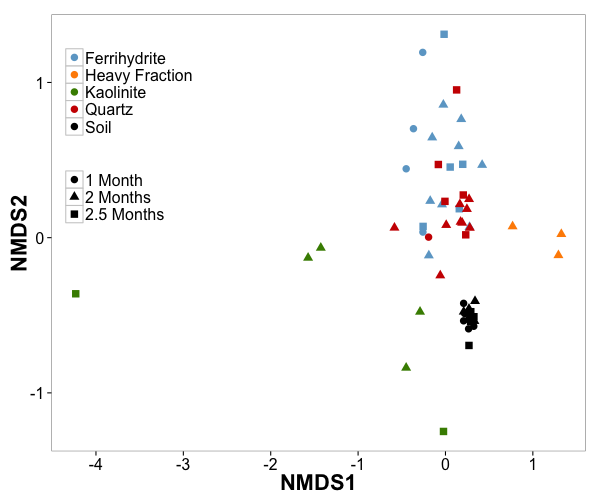

In [12]:
%%R -h 500 -w 600
D <- ord.full
# Sets the relevant ordination

sample_data(ps_snorm)$Cosm=as.factor(sample_data(ps_snorm)$Cosm)
sample_data(ps_snorm)$Month=as.factor(sample_data(ps_snorm)$Month)
sample_data(ps_snorm)$MonthName=ifelse(sample_data(ps_snorm)$Month==2.0,"1 Month", ifelse(sample_data(ps_snorm)$Month==2.5,"2 Months","2.5 Months"))

# Creates an plot object, using the df.sites data, with the x and y axes specified as the PCoA axes,
p = plot_ordination(ps_snorm, D, color = "Trtmt", shape = "MonthName", axes=c(1,2))

# Determines the size of the symbols
p = p  + geom_point(size=3.5) + scale_colour_manual(values=c("skyblue3","darkorange","chartreuse4","red3","black","gold1"))

p = p + guides(colour = guide_legend(""), shape = guide_legend(""))
#p = p + scale_shape_manual(values=c(19,4,17,15,3))

p = p + scale_x_continuous(breaks=c(-4,-3,-2,-1,0,1))
p = p + scale_y_continuous(breaks=c(-1,0,1))

p = p + theme_bw() +
  theme(
      #legend.position = "right",
      legend.justification=c(0,1),
      legend.position=c(0,1),
      legend.box.just= "left",
    plot.background = element_blank()
   ,panel.grid.major = element_blank()
   ,panel.grid.minor = element_blank()
    ,strip.text.x = element_text(size=14, face="bold"),
        axis.title = element_text(size=22, face="bold"),
        axis.text = element_text(size=16),
        legend.text = element_text(size=16),
        legend.title = element_text(size = 22),
        strip.background = element_rect(colour="white", fill="white"))

#p = p + facet_grid(~MonthName)
# Adds a "facet_wrap" to it, which means it will plot it separately by whatever we specify - here, Days

p

In [13]:
%%R
ggsave(filename="NMDS-16S-AllMonths.Argonne.jpg", plot=p ,width=6, height=6)